# Prediction of Precipitation

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [46]:
all = pd.read_csv("temp_adj.csv")
#future = pd.read_csv("X of 2023.csv")
#future

future = pd.read_csv("temp_2023.csv")
X_future = future[['Anomaly','Maximun Temperature','Anomaly.1','Anomaly.2','Average Temperature_x','encode_state','Year','Month','Minimum Temperature','Lastmonth_Average Temperature']]
y_future = future['Average Temperature_y']


## randomforest

{'n_estimators': 450, 'max_depth': 10} best_mse 8.535586789228555 14.371769277537082
Precipitatio_mse 10.061747364018276


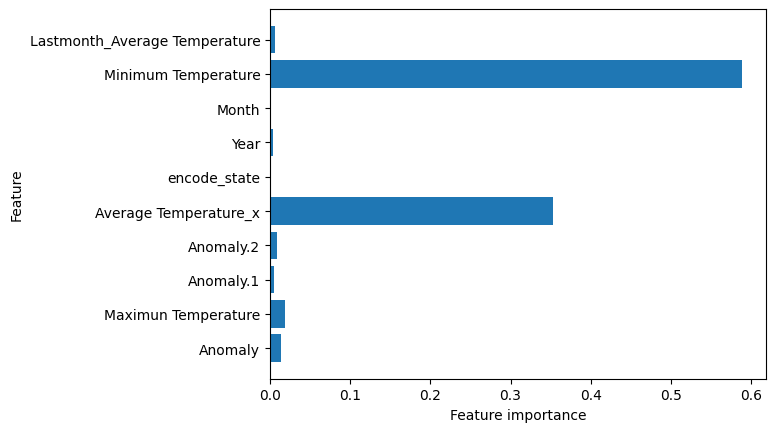

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris

X = all[['Anomaly','Maximun Temperature','Anomaly.1','Anomaly.2','Average Temperature_x','encode_state','Year','Month','Minimum Temperature','Lastmonth_Average Temperature']]
y = all['Average Temperature_y']
dic = {0:'COLORADO',
 1:'KANSAS',
 2:'MINNESOTA',
 3:'MONTANA',
 4:'NEBRASKA',
 5:'NORTH DAKOTA',
 6:'OKLAHOMA',
 7:'SOUTH DAKOTA',
 8:'TEXAS'}

rf_regressor = RandomForestRegressor()



n_estimators = [i for i in range(50,500,50)]  # Number of trees
max_depth = [None, 5, 10, 15]  # Maximum depth

# 進行參數調優
best_mse = float('inf')
best_params = {}

for ratio in range(10,100,10):
    for estimators in n_estimators:
        for depth in max_depth:

            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(ratio/100), random_state=71)
            # 初始化回歸器並設定參數
            regressor = RandomForestRegressor(n_estimators=estimators, 
                                            max_depth=depth,
                                            random_state=71)
            
            # 訓練模型
            regressor.fit(X_train, y_train)
            
            # 預測測試集
            y_pred = regressor.predict(X_test)
            y_pred_train = regressor.predict(X_train)

                
               # 計算均方誤差 
            train_mse = mean_squared_error(y_pred_train, y_train)
            # 計算均方誤差
            mse = mean_squared_error(y_test, y_pred)
            
            # 如果得到更好的結果，則更新最佳參數和最佳均方誤差
            if mse < best_mse:
                best_mse = mse
                best_mse_train = train_mse
                best_params = {
                    'n_estimators': estimators,
                    'max_depth': depth
                }
                best_ratio = ratio

print(best_params,'best_mse',best_mse_train,best_mse)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(best_ratio/100), random_state=71)
# 初始化回歸器並設定參數
regressor = RandomForestRegressor(n_estimators=300, 
                                max_depth=10,
                                random_state=71)

# 訓練模型
regressor.fit(X_train, y_train)

# 預測測試集
y_Fpred = regressor.predict(X_future)

# 計算均方誤差
mse = mean_squared_error(y_future, y_Fpred)

print('Precipitatio_mse',mse)

def plot_feature_importances(model):
    n_features = ['Anomaly','Maximun Temperature','Anomaly.1','Anomaly.2','Average Temperature_x','encode_state','Year','Month','Minimum Temperature','Lastmonth_Average Temperature']
    plt.barh(n_features, model.feature_importances_, align='center')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()





plot_feature_importances(regressor)

data_list = y_Fpred.tolist()

data = np.zeros((len(data_list),4))

for i in range(len(data_list)):
    data[i,0] = data_list[i]

for i in range(len(data_list)):
    data[i,1] = future['encode_state'][i]

for i in range(len(data_list)):
    data[i,2] = future['Year'][i]

for i in range(len(data_list)):
    data[i,3] = future['Month'][i]



columns = ['Precipitation','encode_state','Year','Month']
result = pd.DataFrame(columns=columns, data=data)
result.to_csv('result_RandomForest.csv',encoding = 'gbk')

## svm

In [49]:

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


X = all[['Anomaly','Maximun Temperature','Anomaly.1','Anomaly.2','Average Temperature_x','encode_state','Year','Month','Minimum Temperature','Lastmonth_Average Temperature']]
y = all['Average Temperature_y']
dic = {0:'COLORADO',
 1:'KANSAS',
 2:'MINNESOTA',
 3:'MONTANA',
 4:'NEBRASKA',
 5:'NORTH DAKOTA',
 6:'OKLAHOMA',
 7:'SOUTH DAKOTA',
 8:'TEXAS'}

svr = SVR()

# 定義參數格點（grid）用於調整參數

kernel = ['linear', 'poly', 'rbf']
C= [0.1, 1, 10]
epsilon = [0.01, 0.1, 0.5]


# 進行參數調優
best_mse = float('inf')
best_params = {}

for ratio in range(10,100,10):
    for i in kernel:
        for j in C:
            for k in epsilon:
            
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(ratio/100), random_state=71)
                # 初始化回歸器並設定參數
                svr = SVR(kernel=i, C=j, epsilon=k)
                
                # 訓練模型
                svr.fit(X_train, y_train)
                
                # 預測測試集
                y_pred = svr.predict(X_test)
                y_pred_train = svr.predict(X_train)

                
               # 計算均方誤差 
                train_mse = mean_squared_error(y_pred_train, y_train)
                
                mse = mean_squared_error(y_test, y_pred)
                
                # 如果得到更好的結果，則更新最佳參數和最佳均方誤差
                if mse < best_mse:
                    best_mse = mse
                    best_mse_train = train_mse
                    best_kernel = i
                    best_C = j
                    best_epsilon = k
                    best_ratio = ratio

print('best_mse',best_mse_train,best_mse)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(best_ratio/100), random_state=71)
# 初始化回歸器並設定參數
svr = SVR(kernel=best_kernel, C=best_C , epsilon=best_epsilon)

# 訓練模型
svr.fit(X_train, y_train)

# 預測測試集
y_Fpred = svr.predict(X_future)

# 計算均方誤差
mse = mean_squared_error(y_future, y_Fpred)

print('Precipitatio_mse',mse)




data_list = y_Fpred.tolist()

data = np.zeros((len(data_list),4))

for i in range(len(data_list)):
    data[i,0] = data_list[i]

for i in range(len(data_list)):
    data[i,1] = future['encode_state'][i]

for i in range(len(data_list)):
    data[i,2] = future['Year'][i]

for i in range(len(data_list)):
    data[i,3] = future['Month'][i]


columns = ['Precipitation','encode_state','Year','Month']
result = pd.DataFrame(columns=columns, data=data)
result.to_csv('result_SVM.csv',encoding = 'gbk')


best_mse 15.182660853250598 14.192683604706394
Precipitatio_mse 11.347804531720692


AttributeError: 'SVR' object has no attribute 'feature_importances_'

## XGboost

{'n_estimators': 400, 'max_depth': None, 'max_learning_rate': [0.1, 0.3, 0.5]} best_mse 3.7360790162747763 10.700765097676847 best_ratio 10
[01:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_learning_rate" } are not used.

Precipitatio_mse 24.52141860551872


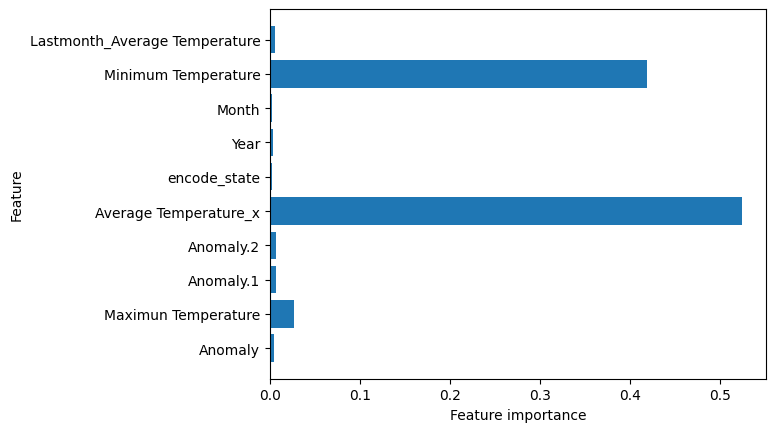

In [54]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X = all[['Anomaly','Maximun Temperature','Anomaly.1','Anomaly.2','Average Temperature_x','encode_state','Year','Month','Minimum Temperature','Lastmonth_Average Temperature']]
y = all['Average Temperature_y']
dic = {0:'COLORADO',
 1:'KANSAS',
 2:'MINNESOTA',
 3:'MONTANA',
 4:'NEBRASKA',
 5:'NORTH DAKOTA',
 6:'OKLAHOMA',
 7:'SOUTH DAKOTA',
 8:'TEXAS'}



n_estimators = [50,100, 200, 300,400]  # Number of trees
max_depth = [None, 5, 10,15]
learning_rate = [0.1, 0.3, 0.5]


best_mse = float('inf')
best_params = {}


for ratio in range(10,100,10):
    for estimators in n_estimators:
        for depth in max_depth:
            for rate in learning_rate:
            
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(ratio/100), random_state=71)
                # 初始化回歸器並設定參數

                params = {
                    'learning_rate': rate,  # 調整的第一個參數
                    'n_estimators': estimators,
                    'max_depth': depth,  # 調整的第二個參數
                    'random_state': 71
                }

                regressor = xgb.XGBRegressor(**params)
                
                # 訓練模型
                regressor.fit(X_train, y_train)
                
                # 預測測試集
                y_pred = regressor.predict(X_test)
                y_pred_train = regressor.predict(X_train)

                
               # 計算均方誤差 
                train_mse = mean_squared_error(y_pred_train, y_train)
                
                mse = mean_squared_error(y_test, y_pred)
                
                # 如果得到更好的結果，則更新最佳參數和最佳均方誤差
                if mse < best_mse:
                    best_mse = mse
                    best_mse_train = train_mse
                    best_params = {
                        
                        'n_estimators': estimators,
                        'max_depth': depth,
                        'max_learning_rate': learning_rate
                    }
                    best_ratio = ratio

print(best_params,'best_mse',best_mse_train,best_mse,'best_ratio',best_ratio)



regressor = xgb.XGBRegressor(**best_params)
            
# 訓練模型
regressor.fit(X_train, y_train)

y_Fpred = regressor.predict(X_future)

# 計算均方誤差
mse = mean_squared_error(y_future, y_Fpred)


print('Precipitatio_mse',mse)

def plot_feature_importances(model):
    n_features = ['Anomaly','Maximun Temperature','Anomaly.1','Anomaly.2','Average Temperature_x','encode_state','Year','Month','Minimum Temperature','Lastmonth_Average Temperature']
    plt.barh(n_features, model.feature_importances_, align='center')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()


plot_feature_importances(regressor)

data_list = y_Fpred.tolist()

data = np.zeros((len(data_list),4))

for i in range(len(data_list)):
    data[i,0] = data_list[i]

for i in range(len(data_list)):
    data[i,1] = future['encode_state'][i]

for i in range(len(data_list)):
    data[i,2] = future['Year'][i]

for i in range(len(data_list)):
    data[i,3] = future['Month'][i]




columns = ['Precipitation','encode_state','Year','Month']
result = pd.DataFrame(columns=columns, data=data)
result.to_csv('result_XGboost.csv',encoding = 'gbk')



## KNN

In [55]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import csv
import numpy as np


X = all[['Anomaly','Maximun Temperature','Anomaly.1','Anomaly.2','Average Temperature_x','encode_state','Year','Month','Minimum Temperature','Lastmonth_Average Temperature']]
y = all['Average Temperature_y']
dic = {0:'COLORADO',
 1:'KANSAS',
 2:'MINNESOTA',
 3:'MONTANA',
 4:'NEBRASKA',
 5:'NORTH DAKOTA',
 6:'OKLAHOMA',
 7:'SOUTH DAKOTA',
 8:'TEXAS'}

# 建立KNN回歸模型
regressor = KNeighborsRegressor()

n_neighbors = [3, 5, 7,9]  # 嘗試不同的K值
weights= ['uniform', 'distance']  # 嘗試不同的加權方式


best_mse = float('inf')
best_params = {}



for ratio in range(10,100,10):
    for i in n_neighbors:
        for j in weights:
# 切割訓練集和測試集
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(ratio/100), random_state=71)

            
            # 定義要調整的參數範圍
            parameters = {
                'n_neighbors': i,  # 嘗試不同的K值
                'weights': j,  # 嘗試不同的加權方式
            }


            regressor = KNeighborsRegressor(n_neighbors = i, weights= j)
            
            # 訓練模型
            regressor.fit(X_train, y_train)
            
            # 預測測試集
            y_pred = regressor.predict(X_test)
            y_pred_train = regressor.predict(X_train)

                
               # 計算均方誤差 
            train_mse = mean_squared_error(y_pred_train, y_train)
            
            mse = mean_squared_error(y_test, y_pred)
            
            # 如果得到更好的結果，則更新最佳參數和最佳均方誤差
            if mse < best_mse:
                best_mse = mse
                best_mse_train = train_mse
                best_n_neighbors = i
                best_weights = j
                best_ratio = ratio

print("Mean Squared Error: ",best_mse_train ,best_mse)

print(best_n_neighbors,best_weights,best_ratio)
# 使用最佳參數的模型進行預測
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(best_ratio/100), random_state=71)
knn = KNeighborsRegressor(n_neighbors = best_n_neighbors, weights= best_weights)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)



# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)


y_Fpred = knn.predict(X_future)

# 計算均方誤差
mse = mean_squared_error(y_future, y_Fpred)

print('Precipitatio_mse',mse)



data_list = y_Fpred.tolist()

data = np.zeros((len(data_list),4))

for i in range(len(data_list)):
    data[i,0] = data_list[i]

for i in range(len(data_list)):
    data[i,1] = future['encode_state'][i]

for i in range(len(data_list)):
    data[i,2] = future['Year'][i]

for i in range(len(data_list)):
    data[i,3] = future['Month'][i]






columns = ['Precipitation','encode_state','Year','Month']
result = pd.DataFrame(columns=columns, data=data)
result.to_csv('result_KNN.csv',encoding = 'gbk')

Mean Squared Error:  0.0 15.51467517454748
7 distance 10
Mean Squared Error:  15.51467517454748
Precipitatio_mse 13.556347600651229


## LinearRegression

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = all[['Anomaly','Maximun Temperature','Anomaly.1','Anomaly.2','Average Temperature_x','encode_state','Year','Month','Minimum Temperature','Lastmonth_Average Temperature']]
y = all['Average Temperature_y']
dic = {0:'COLORADO',
 1:'KANSAS',
 2:'MINNESOTA',
 3:'MONTANA',
 4:'NEBRASKA',
 5:'NORTH DAKOTA',
 6:'OKLAHOMA',
 7:'SOUTH DAKOTA',
 8:'TEXAS'}


# 建立線性回歸模型
regressor = LinearRegression()

# 設定要調整的參數範圍

fit_intercept =[True, False]
copy_X =[True, False]



best_mse = float('inf')
best_params = {}


for ratio in range(10,100,10):
    for i in fit_intercept:
        for k in copy_X:
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(ratio/100), random_state=71)
            # 初始化回歸器並設定參數

            params = {
                'fit_intercept': i,
                
                'copy_X': k,
                
            }




            regressor = LinearRegression(**params)
            
            # 訓練模型
            regressor.fit(X_train, y_train)
            
            # 預測測試集
            y_pred = regressor.predict(X_test)
            y_pred_train = regressor.predict(X_train)

                
               # 計算均方誤差 
            train_mse = mean_squared_error(y_pred_train, y_train)
            mse = mean_squared_error(y_test, y_pred)
            
            # 如果得到更好的結果，則更新最佳參數和最佳均方誤差
            if mse < best_mse:
                best_mse = mse
                best_mse_train = train_mse 
                best_params = {
                    
                    'fit_intercept': i,
                    'copy_X': k
                }
                best_ratio = ratio

print(best_params,'best_mse',best_mse_train,best_mse,'best_ratio',best_ratio)



regressor = LinearRegression(**best_params)
            
# 訓練模型
regressor.fit(X_train, y_train)

y_Fpred = regressor.predict(X_future)

# 計算均方誤差
mse = mean_squared_error(y_future, y_Fpred)


print('Precipitatio_mse',mse)



data_list = y_Fpred.tolist()

data = np.zeros((len(data_list),4))

for i in range(len(data_list)):
    data[i,0] = data_list[i]

for i in range(len(data_list)):
    data[i,1] = future['encode_state'][i]

for i in range(len(data_list)):
    data[i,2] = future['Year'][i]

for i in range(len(data_list)):
    data[i,3] = future['Month'][i]




columns = ['Precipitation','encode_state','Year','Month']
result = pd.DataFrame(columns=columns, data=data)
result.to_csv('result_LinearRegression.csv',encoding = 'gbk')



{'fit_intercept': True, 'copy_X': True} best_mse 15.143614692485254 14.19911116348955 best_ratio 10
Precipitatio_mse 10.86146949842349


## DecisionTreeRegressor

{'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 4, 'random_state': 71}
best_mse 11.574522407674436 17.925607271230913
best_ratio 10
Precipitatio_mse 38.637984476385824


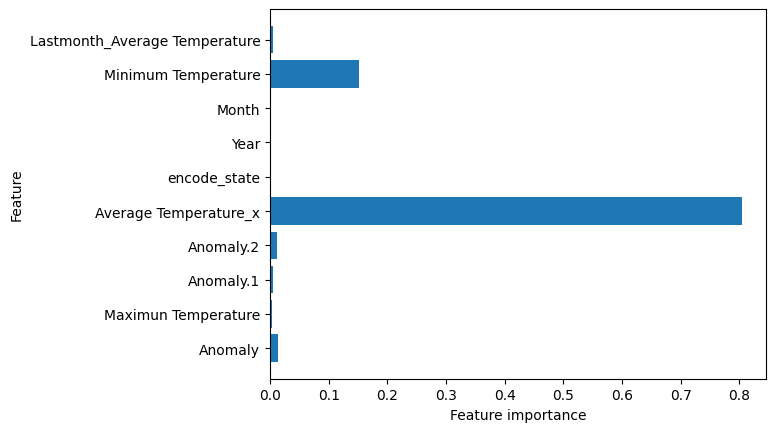

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X = all[['Anomaly','Maximun Temperature','Anomaly.1','Anomaly.2','Average Temperature_x','encode_state','Year','Month','Minimum Temperature','Lastmonth_Average Temperature']]
y = all['Average Temperature_y']
dic = {0:'COLORADO',
 1:'KANSAS',
 2:'MINNESOTA',
 3:'MONTANA',
 4:'NEBRASKA',
 5:'NORTH DAKOTA',
 6:'OKLAHOMA',
 7:'SOUTH DAKOTA',
 8:'TEXAS'}


# 定義不同的參數組合
max_depth_values = [None, 5, 10,15]
min_samples_split_values = [2, 5, 10,20]
min_samples_leaf_values = [1, 2, 4,9]

best_mse = float('inf')
best_params = {}

# 遍歷不同的參數組合
for ratio in range(10,100,10):
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                
                
            #    切分數據集為訓練集和測試集
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(ratio/100), random_state=71)
                # 創建Decision Tree Regression模型
                model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,random_state=71)
                # 在訓練集上擬合模型
                model.fit(X_train, y_train)
                # 在測試集上進行預測
                y_pred_train = model.predict(X_train)
                y_pred = model.predict(X_test)
                # 計算均方誤差
                
                train_mse = mean_squared_error(y_pred_train, y_train)
                mse = mean_squared_error(y_test, y_pred)
                
                # 更新最佳參數組合和均方誤差
                if mse < best_mse:
                    best_mse = mse
                    best_mse_train = train_mse 
                    best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,'random_state':71}
                    best_ratio = ratio

# 打印最佳參數組合
print(best_params)
print('best_mse',best_mse_train,best_mse) 
print('best_ratio',best_ratio)



regressor = DecisionTreeRegressor(**best_params)
            
# 訓練模型
regressor.fit(X_train, y_train)

y_Fpred = regressor.predict(X_future)

# 計算均方誤差
mse = mean_squared_error(y_future, y_Fpred)


print('Precipitatio_mse',mse)

def plot_feature_importances(model):
    n_features = ['Anomaly','Maximun Temperature','Anomaly.1','Anomaly.2','Average Temperature_x','encode_state','Year','Month','Minimum Temperature','Lastmonth_Average Temperature']
    plt.barh(n_features, model.feature_importances_, align='center')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()


plot_feature_importances(regressor)

data_list = y_Fpred.tolist()

data = np.zeros((len(data_list),4))

for i in range(len(data_list)):
    data[i,0] = data_list[i]

for i in range(len(data_list)):
    data[i,1] = future['encode_state'][i]

for i in range(len(data_list)):
    data[i,2] = future['Year'][i]

for i in range(len(data_list)):
    data[i,3] = future['Month'][i]




columns = ['Precipitation','encode_state','Year','Month']
result = pd.DataFrame(columns=columns, data=data)
result.to_csv('result_DecisionTreeRegressor.csv',encoding = 'gbk')

